In [3]:
# Import the packages that you want to use
import xarray as xr
# Import the packages that I want
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [5]:
# z0 (k01) ensemble average
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)
ds_z0avgMean = ds_z0avg.groupby('time.year').mean(dim='time')
ds_z0avgMin = ds_z0avg.groupby('time.year').min(dim='time')

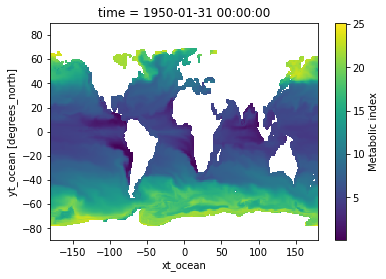

In [7]:
ds_mean = ds_all.groupby('time.year').mean(dim='time')

In [9]:
min_ens = ds_mean.min(dim='ensemble')

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


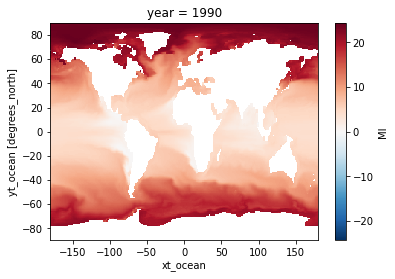

In [10]:
min_ens['MI'].sel(year=1990).plot()

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


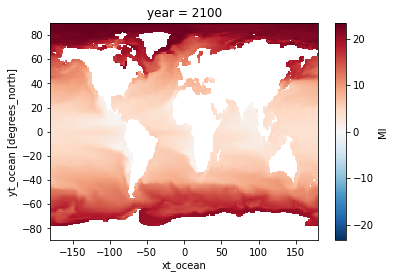

In [57]:
min_ens['MI'].sel(year=2100).plot()

In [25]:
# set color bar using intuitive colors, look into colormaps
def graph(in_year):
    # Specify the projection you want to use
    crs = ccrs.PlateCarree()

    # Create a figure and axes using matplotlib
    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})

    # Specify the longitude and latitude, and the variable that you wish to plot
    X = min_ens['xt_ocean']
    Y = min_ens['yt_ocean']
    Z = min_ens['MI'].sel(year=in_year).squeeze() # .squeeze() gets rid of unnecessary (singular) dimensions
    # To overcome an issue with the discontinous nature of data in the x-dimension, use the add_cyclic_point function
    Z, X = add_cyclic_point(Z,coord=X)

    # Create a contour plot of SST
    im = ax.contourf(X,Y,Z,transform=crs)

    # Add a land mask to your plot, as well as grid lines and coastlines
    ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.gridlines()
    ax.coastlines()

    # Give your plot a title
    ax.set_title('1a. Metabolic Index Min Ensemble '+str(in_year),fontsize=14,loc='left')

    # Finally, add a colorbar
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
    cbar.set_label('metabolic index',fontsize=12)

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encoun

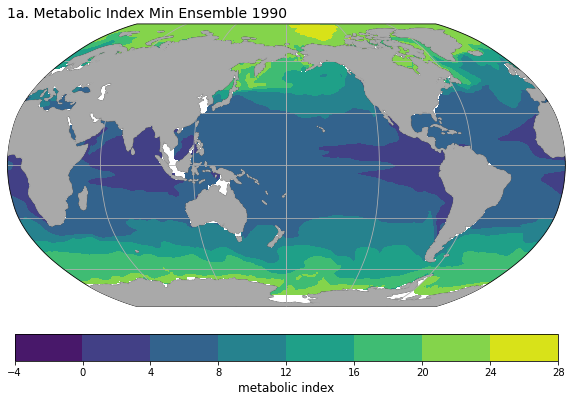

In [26]:
graph(1990)

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/utils.py:30: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encoun

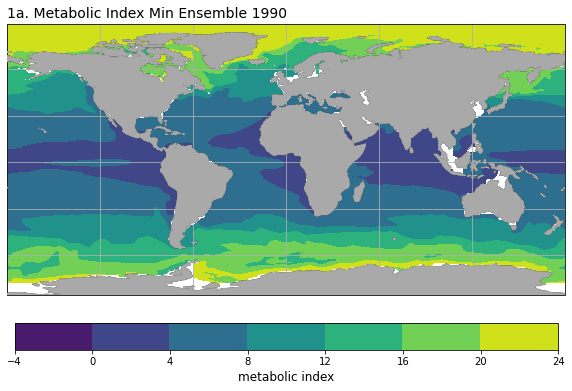

In [68]:
graph(2100)